# FINAL PROJECT  

In [21]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import seaborn as sns
import warnings
import requests
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup

# sklearn imports
from sklearn import linear_model
from sklearn import metrics




# SCRAPING:

In this section i scrape data from a website named: Metacritics.
This site reviews and grades released video games. It has done so for many years so I decided to use it.
I took most games from this website and created a Data Frame.
Not all the data is presented in the first page so I had to use crawling and open the inner page to reach more data.

In [77]:


#creating list for each column

names = []
release_dates = []
amount_of_platformss = []
platforms = []
meta_scores = []
user_scores = []
summeries = []
amount_of_meta_criticss = []
devs =[]
all_genres = []
publishers = []

urls=[]
base_url = "https://www.metacritic.com";

#scraping and crawling 40 pages
a = 0
for j in range(52):
    print("PAGE : " + str(j) + "------------")
    x = "https://www.metacritic.com/browse/games/score/metascore/all/pc/filtered?page=" + str(j)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(x , headers = user_agent);
    soup = BeautifulSoup(response.content,'html.parser')
    all_games = soup.find_all("tr")  
    for i in range(0, len(all_games), 2):
        print(f"GAME: {i//2}")
          
        print(a)
        #scraping data from the list
        name_elem = all_games[i].find("a", class_="title")
        name = name_elem.get_text().strip() if name_elem else "N/A"

        release_date_elem = all_games[i].find("div", class_="clamp-details").find_all("span")
        release_date = release_date_elem[2].get_text().strip() if len(release_date_elem) >= 3 else "N/A"

        platform_elem = all_games[i].find("div", class_="clamp-details").find_all("span")
        platform = platform_elem[1].get_text().strip() if len(platform_elem) >= 2 else "N/A"

        meta_score_elem = all_games[i].find("a", class_="metascore_anchor")
        meta_score = meta_score_elem.get_text().strip() if meta_score_elem else "N/A"

        user_score_elem = all_games[i].find_all("a", class_="metascore_anchor")
        user_score = user_score_elem[-1].get_text().strip() if len(user_score_elem) >= 1 else "N/A"

        summary_elem = all_games[i].find("div", class_="summary")
        summary = summary_elem.get_text().strip() if summary_elem else "N/A"

        #crawling into the innerpage for each video-game
        next_url = base_url + all_games[i].find_all("a")[2]['href'].strip()
        html = requests.get(next_url , headers = user_agent);
        next_soup = BeautifulSoup(html.content,'html.parser')
        
        #scraping data from inner page
        if html.status_code != 404:
            amount_of_meta_critics = next_soup.find("div" , class_="summary")
            if amount_of_meta_critics:
                amount_of_meta_critics = amount_of_meta_critics.find("a").find("span").get_text().strip()
            else:
                amount_of_meta_critics = "0"
            
            dev_div = next_soup.find("li" , class_="summary_detail developer")
            if dev_div:
                developer = dev_div.find_all("span")[1].get_text().strip()
            else:
                developer = "?"
            
            #genres
            genres_div = next_soup.find("li" , class_="summary_detail product_genre")
            genre = ""
            if genres_div:
                genres = genres_div.find_all("span" , class_="data")
                for i in genres:
                    genre = genre + i.get_text() + ","    
                genre = genre[:-1]

            also_on = next_soup.find("li" , class_="summary_detail product_platforms")
            if also_on:
                amount_of_platforms = len(also_on.find_all('a'))+1
            else:
                amount_of_platforms = 1 
            #creatng a list of genres for each game
            
            
            publisher_div = next_soup.find("li" , class_="summary_detail publisher");
            if publisher_div:
                publisher = publisher_div.find("a").get_text().strip()
            else:
                publisher = "?"
        else:
            amount_of_meta_critics="0"
            developer = "?"
            genre = "?"
            amount_of_platforms= 1

        #adding all data to the lists
        names.append(name)
        release_dates.append(release_date)
        platforms.append(platform)
        meta_scores.append(meta_score)
        user_scores.append(user_score)
        summeries.append(summery)
        #innerpage
        amount_of_meta_criticss.append(amount_of_meta_critics)
        devs.append(developer)
        publishers.append(publisher)
        all_genres.append(genre);
        amount_of_platformss.append(amount_of_platforms)
        a = a+1


PAGE : 0------------
GAME: 0
0
GAME: 1
1
GAME: 2
2
GAME: 3
3
GAME: 4
4
GAME: 5
5
GAME: 6
6
GAME: 7
7
GAME: 8
8
GAME: 9
9
GAME: 10
10
GAME: 11
11
GAME: 12
12
GAME: 13
13
GAME: 14
14
GAME: 15
15
GAME: 16
16
GAME: 17
17
GAME: 18
18
GAME: 19
19
GAME: 20
20
GAME: 21
21
GAME: 22
22
GAME: 23
23
GAME: 24
24
GAME: 25
25
GAME: 26
26
GAME: 27
27
GAME: 28
28
GAME: 29
29
GAME: 30
30
GAME: 31
31
GAME: 32
32
GAME: 33
33
GAME: 34
34
GAME: 35
35
GAME: 36
36
GAME: 37
37
GAME: 38
38
GAME: 39
39
GAME: 40
40
GAME: 41
41
GAME: 42
42
GAME: 43
43
GAME: 44
44
GAME: 45
45
GAME: 46
46
GAME: 47
47
GAME: 48
48
GAME: 49
49
GAME: 50
50
GAME: 51
51
GAME: 52
52
GAME: 53
53
GAME: 54
54
GAME: 55
55
GAME: 56
56
GAME: 57
57
GAME: 58
58
GAME: 59
59
GAME: 60
60
GAME: 61
61
GAME: 62
62
GAME: 63
63
GAME: 64
64
GAME: 65
65
GAME: 66
66
GAME: 67
67
GAME: 68
68
GAME: 69
69
GAME: 70
70
GAME: 71
71
GAME: 72
72
GAME: 73
73
GAME: 74
74
GAME: 75
75
GAME: 76
76
GAME: 77
77
GAME: 78
78
GAME: 79
79
GAME: 80
80
GAME: 81
81
GAME: 82
82
GAM

In [78]:
print(len(names))
print(len(release_dates))
print(len(platforms))
print(len(meta_scores))
print(len(user_scores))
print(len(summeries))
print(len(amount_of_meta_criticss))
print(len(devs))
print(len(publishers))
print(len(amount_of_platformss))
print(len(all_genres))


2800
2800
2800
2800
2800
2800
2800
2800
2800
2800
2800


In [79]:
#df is the data frame that contains all the data we scraped
df = pd.DataFrame(data = {
    "name" : names , 
    "release_dates" : release_dates , 
    "platforms":platforms , 
    "meta_scores" : meta_scores , 
    "user_scores" : user_scores , 
    "summeries" : summeries , 
    "num_meta_critics" : amount_of_meta_criticss , 
    "developer" : devs , 
    "publisher" : publishers ,
    "amount_of_platforms" : amount_of_platformss , 
    "all_genres" : all_genres})
df
#11

,name,release_dates,platforms,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,all_genres
0,Disco Elysium: The Final Cut,"March 30, 2021",PC,97,8.3,Milo arrives on Earth to find that he's way to...,11,ZA/UM,ZA/UM,8,"Role-Playing,General,Western-Style"
1,Half-Life 2,"November 16, 2004",PC,96,9.2,Milo arrives on Earth to find that he's way to...,81,Valve Software,VU Games,1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci..."
2,Grand Theft Auto V,"April 13, 2015",PC,96,7.8,Milo arrives on Earth to find that he's way to...,57,Rockstar North,Rockstar Games,7,"Modern,Action Adventure,Open-World"
3,The Orange Box,"October 10, 2007",PC,96,9.1,Milo arrives on Earth to find that he's way to...,34,Valve Software,EA Games,3,"Action,Miscellaneous,Shooter,Compilation,First..."
4,Half-Life,"November 19, 1998",PC,96,9.1,Milo arrives on Earth to find that he's way to...,24,Valve Software,Sierra Entertainment,2,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci..."
...,...,...,...,...,...,...,...,...,...,...,...
2795,Lost Empire: Immortals,"March 11, 2008",PC,58,6.8,Milo arrives on Earth to find that he's way to...,0,?,?,1,
2796,ReCore,"September 13, 2016",PC,58,5.9,Milo arrives on Earth to find that he's way to...,0,?,?,1,
2797,Maelstrom: The Battle For Earth Begins,"February 20, 2007",PC,58,6.3,Milo arrives on Earth to find that he's way to...,0,?,?,1,
2798,Transformers: Revenge of the Fallen,"June 23, 2009",PC,58,5.5,Milo arrives on Earth to find that he's way to...,0,?,?,1,


In [80]:
df.to_csv("./big_df.csv")

## PROCESSING
After getting all the games I wanted to separate the genred column into binary columns of the main genres.
Each new column represents whether the game is from a specific category.
I checked each game's genres for a specific word to achieve this.

In [81]:
# seperating genres
#note that those are not all the genres we just took the main ones
action_game = []
general_game = []
rpg_game =[]
open_world_game =[]
survival_game= []
shooter_game=[]
point_and_click_game =[]
strategy_game =[]
sports_game =[]
racing_game =[]


#checking if a word is in the string that describes all genres
#if yes append one, otherwise add 0
for i in df.all_genres:
    if("Action" in i):
        action_game.append(1)
    else:
        action_game.append(0)
        
    if("General" in i):
        general_game.append(1)
    else:
        general_game.append(0)
    
    if("Role-Playing" in i or "RPG" in i):
        rpg_game.append(1)
    else:
        rpg_game.append(0)
    
    if("Open-World" in i):
        open_world_game.append(1)
    else:
        open_world_game.append(0)
        
    if("Survival" in i):
        survival_game.append(1)
    else:
        survival_game.append(0)
    
    if("Shooter" in i):
        shooter_game.append(1)
    else:
        shooter_game.append(0)
        
    if("Point-and-Click" in i):
        point_and_click_game.append(1)
    else:
        point_and_click_game.append(0)
        
    if("Sports" in i):
        sports_game.append(1)
    else:
        sports_game.append(0)
        
    if("Strategy" in i):
        strategy_game.append(1)
    else:
        strategy_game.append(0)
    if("Racing" in i):
        racing_game.append(1)
    else:
        racing_game.append(0)


### This is how the new columns look like:

In [82]:
df["is_action"] = action_game
df["is_general"] = general_game
df["is_rpg"] = rpg_game
df["is_open_world"] = open_world_game
df["is_survival"] = survival_game
df["is_shooter"] = shooter_game
df["is_point_and_click"] = point_and_click_game
df["is_strategy"] = strategy_game
df["is_sports"] = sports_game
df["is_racing"] = racing_game

#showing the new columns
df[['is_action' ,'is_general' , "is_rpg" , "is_open_world", "is_survival", "is_shooter", "is_point_and_click", "is_strategy", "is_sports" , "is_racing"]]

,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing
0,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2795,0,0,0,0,0,0,0,0,0,0
2796,0,0,0,0,0,0,0,0,0,0
2797,0,0,0,0,0,0,0,0,0,0
2798,0,0,0,0,0,0,0,0,0,0


### This is how the whole Data Frame looks like:

In [83]:
df

,name,release_dates,platforms,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,...,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing
0,Disco Elysium: The Final Cut,"March 30, 2021",PC,97,8.3,Milo arrives on Earth to find that he's way to...,11,ZA/UM,ZA/UM,8,...,0,1,1,0,0,0,0,0,0,0
1,Half-Life 2,"November 16, 2004",PC,96,9.2,Milo arrives on Earth to find that he's way to...,81,Valve Software,VU Games,1,...,1,0,0,0,0,1,0,0,0,0
2,Grand Theft Auto V,"April 13, 2015",PC,96,7.8,Milo arrives on Earth to find that he's way to...,57,Rockstar North,Rockstar Games,7,...,1,0,0,1,0,0,0,0,0,0
3,The Orange Box,"October 10, 2007",PC,96,9.1,Milo arrives on Earth to find that he's way to...,34,Valve Software,EA Games,3,...,1,0,0,0,0,1,0,0,0,0
4,Half-Life,"November 19, 1998",PC,96,9.1,Milo arrives on Earth to find that he's way to...,24,Valve Software,Sierra Entertainment,2,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,Lost Empire: Immortals,"March 11, 2008",PC,58,6.8,Milo arrives on Earth to find that he's way to...,0,?,?,1,...,0,0,0,0,0,0,0,0,0,0
2796,ReCore,"September 13, 2016",PC,58,5.9,Milo arrives on Earth to find that he's way to...,0,?,?,1,...,0,0,0,0,0,0,0,0,0,0
2797,Maelstrom: The Battle For Earth Begins,"February 20, 2007",PC,58,6.3,Milo arrives on Earth to find that he's way to...,0,?,?,1,...,0,0,0,0,0,0,0,0,0,0
2798,Transformers: Revenge of the Fallen,"June 23, 2009",PC,58,5.5,Milo arrives on Earth to find that he's way to...,0,?,?,1,...,0,0,0,0,0,0,0,0,0,0


### New size of the Data Frame:

In [84]:
print("THE AMOUNT OF CELLS IN THE DF IS : " + str(2800 * 21 ))

THE AMOUNT OF CELLS IN THE DF IS : 58800


# DATA CLEANING AND PROCESSING


### Turning some columns into integers

In [85]:
#metascore and the amount of meta critics turn to int
df['meta_scores'] = df['meta_scores'].astype(int)
df['num_meta_critics'] = df['num_meta_critics'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 2800 non-null   object
 1   release_dates        2800 non-null   object
 2   platforms            2800 non-null   object
 3   meta_scores          2800 non-null   int32 
 4   user_scores          2800 non-null   object
 5   summeries            2800 non-null   object
 6   num_meta_critics     2800 non-null   int32 
 7   developer            2800 non-null   object
 8   publisher            2800 non-null   object
 9   amount_of_platforms  2800 non-null   int64 
 10  all_genres           2800 non-null   object
 11  is_action            2800 non-null   int64 
 12  is_general           2800 non-null   int64 
 13  is_rpg               2800 non-null   int64 
 14  is_open_world        2800 non-null   int64 
 15  is_survival          2800 non-null   int64 
 16  is_sho

### REMOVE 'tbd' VALUES:
To not hurt the AVG

In [86]:
#removing all 'tbd' (to be determined scores)
print("SIZE BEFORE:")
print(len(df.name))

df = df[df.user_scores != 'tbd'];


print("\nSIZE AFTER:")
print(len(df.name))
#showing before and after sized

SIZE BEFORE:
2800

SIZE AFTER:
2722


REMOVE ROWS WITH LESS THAN 8 CRITICS

In [87]:
print("SIZE BEFORE:")
len(df.name)

SIZE BEFORE:


2722

In [88]:
df = df[df.num_meta_critics >7]

print("SIZE AFTER:")
len(df.name)

SIZE AFTER:


1034

### TURN user_scores TO INT VALUES
Note: All user scores are from 0 to 10. The Meta scores are from 0 to 100. That's why I multiplied the whole column in 10.

In [89]:
#the user scored before are a string of a number between 0 - 10
#we multiplied the score by 10 to be similar to the meta scores
df['user_scores'] = df['user_scores'].astype(float)
df['user_scores'] = df['user_scores']*10
df['user_scores'] = df['user_scores'].astype(int)


In [21]:
df

,name,release_dates,platforms,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,...,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing
0,Disco Elysium: The Final Cut,"March 30, 2021",PC,97,82,Disco Elysium - The Final Cut is the definitiv...,11,ZA/UM,ZA/UM,8,...,0,1,1,0,0,0,0,0,0,0
1,Half-Life 2,"November 16, 2004",PC,96,92,[Metacritic's 2004 PC Game of the Year] By ta...,81,Valve Software,VU Games,1,...,1,0,0,0,0,1,0,0,0,0
2,Grand Theft Auto V,"April 13, 2015",PC,96,78,Los Santos: a sprawling sun-soaked metropolis ...,57,Rockstar North,Rockstar Games,7,...,1,0,0,1,0,0,0,0,0,0
3,The Orange Box,"October 10, 2007",PC,96,91,Games included in The Orange Box compilation: ...,34,Valve Software,EA Games,3,...,1,0,0,0,0,1,0,0,0,0
4,Half-Life,"November 19, 1998",PC,96,91,Half-Life combines great storytelling in the t...,24,Valve Software,Sierra Entertainment,2,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Timeline (2000),"November 12, 2000",PC,41,53,Make your way through a challenging and perilo...,13,Timeline Computer Entertainment,Eidos Interactive,1,...,1,1,0,0,0,0,0,0,0,0
4994,DARK,"July 3, 2013",PC,41,42,DARK is a stealth action game with RPG element...,21,"Kalypso, Realmforge Studios",Kalypso,2,...,1,1,0,0,0,0,0,0,0,0
4995,Seduce Me,"January 2, 2013",PC,41,33,Having happened upon an invite to a wealthy so...,12,?,No Reply Games,1,...,0,1,0,0,0,0,0,1,0,0
4996,Brigade E5: New Jagged Union,"October 17, 2006",PC,41,68,Brigade E5: New Jagged Union is set in the fic...,9,Apeiron,Strategy First,1,...,0,1,0,0,0,0,0,1,0,0


### CREATE A COLUMN FOR avg_score BETWEEN meta_score and user_score
Now that both user and meta score are similar in range I can create the avarage score beween them.
This score will determine which game is considered successful.
I chose to do this because meta score only is not reliable enough, we will see in EDA how it affects the score.

In [90]:
df["avg_score"] = (df['user_scores'] + df['meta_scores'])/2

In [91]:
df.avg_score

0       90.0
1       94.0
2       87.0
3       93.5
4       93.5
        ... 
2755    66.5
2778    62.0
2785    43.5
2792    67.5
2794    53.0
Name: avg_score, Length: 1034, dtype: float64

# FIRST DATA ANALYSIS:


In [92]:
df

,name,release_dates,platforms,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,...,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score
0,Disco Elysium: The Final Cut,"March 30, 2021",PC,97,83,Milo arrives on Earth to find that he's way to...,11,ZA/UM,ZA/UM,8,...,1,1,0,0,0,0,0,0,0,90.0
1,Half-Life 2,"November 16, 2004",PC,96,92,Milo arrives on Earth to find that he's way to...,81,Valve Software,VU Games,1,...,0,0,0,0,1,0,0,0,0,94.0
2,Grand Theft Auto V,"April 13, 2015",PC,96,78,Milo arrives on Earth to find that he's way to...,57,Rockstar North,Rockstar Games,7,...,0,0,1,0,0,0,0,0,0,87.0
3,The Orange Box,"October 10, 2007",PC,96,91,Milo arrives on Earth to find that he's way to...,34,Valve Software,EA Games,3,...,0,0,0,0,1,0,0,0,0,93.5
4,Half-Life,"November 19, 1998",PC,96,91,Milo arrives on Earth to find that he's way to...,24,Valve Software,Sierra Entertainment,2,...,0,0,0,0,1,0,0,0,0,93.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,Gas Guzzlers: Combat Carnage,"May 18, 2012",PC,58,75,Milo arrives on Earth to find that he's way to...,13,Gamepires,Gamepires,1,...,0,0,0,0,0,0,0,0,1,66.5
2778,Paradise Lost,"March 24, 2021",PC,58,66,Milo arrives on Earth to find that he's way to...,12,PolyAmorous,PolyAmorous,4,...,0,0,0,0,0,0,0,0,0,62.0
2785,Tom Clancy's Ghost Recon: Breakpoint,"October 4, 2019",PC,58,29,Milo arrives on Earth to find that he's way to...,30,Ubisoft Paris,Ubisoft,4,...,0,0,1,0,0,0,0,0,0,43.5
2792,Castlevania: Lords of Shadow 2,"February 25, 2014",PC,58,77,Milo arrives on Earth to find that he's way to...,16,Mercury Steam,Konami,3,...,1,0,0,0,0,0,0,0,0,67.5


In [93]:
print("Different Games:")
print(len(df.name.value_counts()))

Different Games:
1033


In [94]:
print("Different Developers:")
print(len(df.developer.value_counts()))

Different Developers:
605


In [95]:
print("Different Publishers:")
print(len(df.publisher.value_counts()))

Different Publishers:
367


In [96]:
print("Different Main Genres:")
print(10)

Different Main Genres:
10


### ADD COLUMN FOR SUCCESSFUL GAMES

In [97]:
sucessful = []
for score in df.avg_score:
    if score > 81:
        sucessful.append(1)
    else : sucessful.append(0)
df["is_successful"] = sucessful
print("Amount of unsuccessful games:")
print(len(df[df.is_successful == 0]))
print("Amount of successful games:")
print(len(df[df.is_successful == 1]))


Amount of unsuccessful games:
628
Amount of successful games:
406


# EDA

In [98]:
df.describe()

,meta_scores,user_scores,num_meta_critics,amount_of_platforms,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,81.667311,73.941973,28.069632,3.037718,0.533849,0.351064,0.199226,0.068665,0.034816,0.177950,0.023211,0.198259,0.017408,0.044487,77.804642,0.392650
std,7.054864,13.167567,17.627395,1.808212,0.499094,0.477534,0.399612,0.253007,0.183403,0.382655,0.150645,0.398881,0.130850,0.206275,8.626180,0.488576
min,58.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000
25%,79.000000,69.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.500000,0.000000
50%,82.000000,77.000000,23.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.500000,0.000000
75%,86.000000,83.000000,37.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,1.000000
max,97.000000,92.000000,104.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,1.000000


### THIS IS THE REPRESENTATION OF THE AVG SCORE

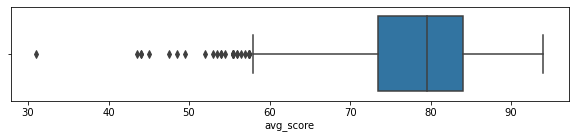

Avarage is : 77.8046421663443


In [99]:
plt.figure(figsize=(10, 10))

plt.subplot(511)

sns.boxplot(df["avg_score"])

plt.show()

print("Avarage is : " + str(df["avg_score"].mean()))

### THIS IS THE REPRESENTATION OF THE META SCORES

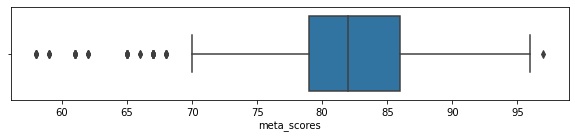

Avarage is : 81.66731141199226


In [100]:
plt.figure(figsize=(10, 10))

plt.subplot(511)

sns.boxplot(df["meta_scores"])

plt.show()
print("Avarage is : " + str(df["meta_scores"].mean()))

### THIS IS THE REPRESENTATION OF THE USER SCORES

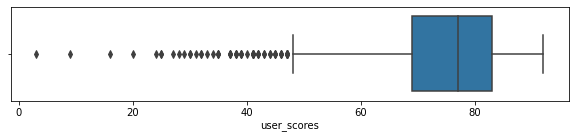

Avarage is : 73.94197292069633


In [101]:
plt.figure(figsize=(10, 10))

plt.subplot(511)

sns.boxplot(df["user_scores"])

plt.show()

print("Avarage is : " + str(df["user_scores"].mean()))

### NOTE:

I can see that the users on avarage rate games lower than website owners(meta_scores).
That's if the users dislike a game they give it very low ratings, after all they are the customers who buy the Video Games.
I can also see that minimum score is much lower than the meta scores.
Overall the user scores are essential and has to be weighed in because it can turn a game from successful to unsuccessful.

## SHOWING THE AMOUNTS OF GAMES IN EACH CATEGORY

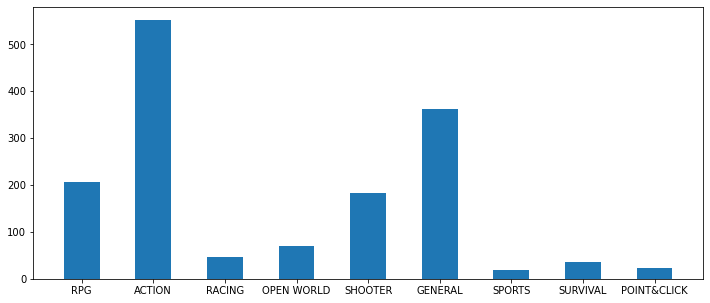

In [102]:
fig = plt.figure(figsize=(12,5))
names = ["RPG","ACTION","RACING","OPEN WORLD","SHOOTER","GENERAL","SPORTS" , "SURVIVAL", "POINT&CLICK"]
scores = [len(df.is_rpg[df.is_rpg == 1]),
          len(df.is_action[df.is_action == 1]),
          len(df.is_racing[df.is_racing == 1]),
          len(df.is_open_world[df.is_open_world == 1]),
          len(df.is_shooter[df.is_shooter == 1]),
          len(df.is_general[df.is_general == 1]),
          len(df.is_sports[df.is_sports == 1]),
          len(df.is_survival[df.is_survival == 1]),
          len(df.is_point_and_click[df.is_point_and_click == 1])]
positions= [0,1,2,3,4,5,6,7,8]

plt.bar(positions , scores , width=0.5 , )

plt.xticks(positions, names)

plt.show()



i can see that many games are categorised as Action Games.

SHOW HOW MANY GAMES RELEASED ON EACH MONTH OF THE YEAR

In [103]:
#COUNT 

jan=feb=mar=apr=may=jun=jul=aug=sep=octb=nov=dec=0;

for rd in df.release_dates:
    if "January" in rd:
        jan = jan+1
    elif "February" in rd:
        feb = feb+1
    elif "March" in rd:
        mar = mar+1
    elif "April" in rd:
        apr = apr+1
    elif "May" in rd:
        may = may+1;
    elif "June" in rd:
        jun = jun+1;
    elif "July" in rd:
        jul = jul+1;
    elif "August" in rd:
        aug = aug+1;
    elif "Septermber" in rd:
        sep = sep+1;
    elif "October" in rd:
        octb = octb+1;
    elif "November" in rd:
        nov = nov+1;
    elif "December" in rd:
        dec = dec+1;


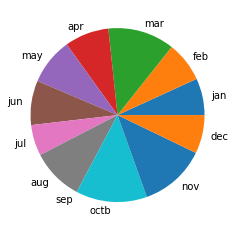

[63, 69, 114, 76, 80, 76, 53, 89, 0, 122, 114, 66]

In [104]:
#SHOW

games = [jan,feb,mar,apr,may,jun,jul,aug,sep,octb,nov,dec]
months = ["jan","feb","mar","apr","may","jun","jul","aug","sep","octb","nov","dec"]
#exp =[0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(games, labels=months)
plt.show()
games

### Most games are released on October.

## Correlation beween amount of platforms and success

<AxesSubplot:xlabel='amount_of_platforms'>

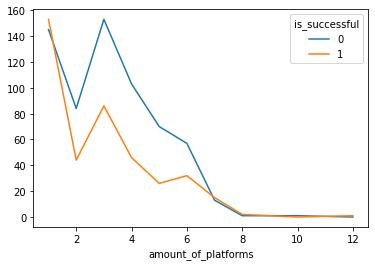

In [105]:
ct = pd.crosstab( df.amount_of_platforms , df.is_successful)
ct.plot()

### There's no correlation between the amount of platforms and the success level of a game.

# DATA ENGENEERING

### CREATING DATA FRAME df_numeric FOR MACHINE LEARNING ALGORITHMS
Splitting Month and Year of Release Date.
Removing non-categorical columns.
Turning categorical columns into numbers.

In [106]:
df_numeric = df.copy();
#remove platform
df_numeric = df_numeric.loc[:, df_numeric.columns!='platforms']
#remove Genres (already turned to numbers)
df_numeric = df_numeric.loc[:, df_numeric.columns!='all_genres']



df_numeric

,name,release_dates,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,is_action,...,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful
0,Disco Elysium: The Final Cut,"March 30, 2021",97,83,Milo arrives on Earth to find that he's way to...,11,ZA/UM,ZA/UM,8,0,...,1,0,0,0,0,0,0,0,90.0,1
1,Half-Life 2,"November 16, 2004",96,92,Milo arrives on Earth to find that he's way to...,81,Valve Software,VU Games,1,1,...,0,0,0,1,0,0,0,0,94.0,1
2,Grand Theft Auto V,"April 13, 2015",96,78,Milo arrives on Earth to find that he's way to...,57,Rockstar North,Rockstar Games,7,1,...,0,1,0,0,0,0,0,0,87.0,1
3,The Orange Box,"October 10, 2007",96,91,Milo arrives on Earth to find that he's way to...,34,Valve Software,EA Games,3,1,...,0,0,0,1,0,0,0,0,93.5,1
4,Half-Life,"November 19, 1998",96,91,Milo arrives on Earth to find that he's way to...,24,Valve Software,Sierra Entertainment,2,1,...,0,0,0,1,0,0,0,0,93.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,Gas Guzzlers: Combat Carnage,"May 18, 2012",58,75,Milo arrives on Earth to find that he's way to...,13,Gamepires,Gamepires,1,0,...,0,0,0,0,0,0,0,1,66.5,0
2778,Paradise Lost,"March 24, 2021",58,66,Milo arrives on Earth to find that he's way to...,12,PolyAmorous,PolyAmorous,4,0,...,0,0,0,0,0,0,0,0,62.0,0
2785,Tom Clancy's Ghost Recon: Breakpoint,"October 4, 2019",58,29,Milo arrives on Earth to find that he's way to...,30,Ubisoft Paris,Ubisoft,4,1,...,0,1,0,0,0,0,0,0,43.5,0
2792,Castlevania: Lords of Shadow 2,"February 25, 2014",58,77,Milo arrives on Earth to find that he's way to...,16,Mercury Steam,Konami,3,1,...,0,0,0,0,0,0,0,0,67.5,0


## Developers and Publishers into categorical numbers each number represents unique developer/publisher

In [107]:

print("Developers:")
print(df["developer"].value_counts())
print("\n")
print("Publishers:")
print(df["publisher"].value_counts())
df_numeric["developer"] = pd.factorize(df.developer)[0]
df_numeric["publisher"] = pd.factorize(df.publisher)[0]

Developers:
Blizzard Entertainment        21
Ubisoft Montreal              17
BioWare                       16
Codemasters                   14
Paradox Development Studio    13
                              ..
DONTNOD Entertainment          1
Nival Interactive              1
Toys for Bob                   1
Ninja Theory                   1
Ubisoft Paris                  1
Name: developer, Length: 605, dtype: int64


Publishers:
Electronic Arts           57
Ubisoft                   57
2K Games                  30
Activision                26
Microsoft Game Studios    25
                          ..
KillHouse Games            1
Fellow Traveller           1
Soedesco                   1
Demruth                    1
PolyAmorous                1
Name: publisher, Length: 367, dtype: int64


In [108]:
print("Developers:")
print(df_numeric["developer"].value_counts())
print("\n")
print("Publishers:")
print(df_numeric["publisher"].value_counts())

Developers:
11     21
25     17
4      16
93     14
129    13
       ..
264     1
263     1
262     1
261     1
604     1
Name: developer, Length: 605, dtype: int64


Publishers:
9      57
24     57
5      30
22     26
28     25
       ..
186     1
187     1
189     1
191     1
366     1
Name: publisher, Length: 367, dtype: int64


In [109]:
df_numeric

,name,release_dates,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,is_action,...,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful
0,Disco Elysium: The Final Cut,"March 30, 2021",97,83,Milo arrives on Earth to find that he's way to...,11,0,0,8,0,...,1,0,0,0,0,0,0,0,90.0,1
1,Half-Life 2,"November 16, 2004",96,92,Milo arrives on Earth to find that he's way to...,81,1,1,1,1,...,0,0,0,1,0,0,0,0,94.0,1
2,Grand Theft Auto V,"April 13, 2015",96,78,Milo arrives on Earth to find that he's way to...,57,2,2,7,1,...,0,1,0,0,0,0,0,0,87.0,1
3,The Orange Box,"October 10, 2007",96,91,Milo arrives on Earth to find that he's way to...,34,1,3,3,1,...,0,0,0,1,0,0,0,0,93.5,1
4,Half-Life,"November 19, 1998",96,91,Milo arrives on Earth to find that he's way to...,24,1,4,2,1,...,0,0,0,1,0,0,0,0,93.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,Gas Guzzlers: Combat Carnage,"May 18, 2012",58,75,Milo arrives on Earth to find that he's way to...,13,602,365,1,0,...,0,0,0,0,0,0,0,1,66.5,0
2778,Paradise Lost,"March 24, 2021",58,66,Milo arrives on Earth to find that he's way to...,12,603,366,4,0,...,0,0,0,0,0,0,0,0,62.0,0
2785,Tom Clancy's Ghost Recon: Breakpoint,"October 4, 2019",58,29,Milo arrives on Earth to find that he's way to...,30,604,24,4,1,...,0,1,0,0,0,0,0,0,43.5,0
2792,Castlevania: Lords of Shadow 2,"February 25, 2014",58,77,Milo arrives on Earth to find that he's way to...,16,347,35,3,1,...,0,0,0,0,0,0,0,0,67.5,0


In [110]:
#deal with release dates
# we split this string column into 2 numeric columns, year and month
year_only = []
month_only = []
for string in df.release_dates:
    year_only.append(string.split(",")[1].strip())
    month_only.append(string.split(" ")[0].strip())
df_numeric["year"] = year_only
df_numeric["month"] = month_only
#turn month into categorical numerics
df_numeric["month"] = pd.factorize(df_numeric.month)[0]
df_numeric = df_numeric.loc[:, df_numeric.columns!='release_dates']

In [111]:
df_numeric = df_numeric.loc[:, df_numeric.columns!='name']
df_numeric = df_numeric.loc[:, df_numeric.columns!='summeries']

df_numeric

,meta_scores,user_scores,num_meta_critics,developer,publisher,amount_of_platforms,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful,year,month
0,97,83,11,0,0,8,0,1,1,0,0,0,0,0,0,0,90.0,1,2021,0
1,96,92,81,1,1,1,1,0,0,0,0,1,0,0,0,0,94.0,1,2004,1
2,96,78,57,2,2,7,1,0,0,1,0,0,0,0,0,0,87.0,1,2015,2
3,96,91,34,1,3,3,1,0,0,0,0,1,0,0,0,0,93.5,1,2007,3
4,96,91,24,1,4,2,1,0,0,0,0,1,0,0,0,0,93.5,1,1998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,58,75,13,602,365,1,0,0,0,0,0,0,0,0,0,1,66.5,0,2012,7
2778,58,66,12,603,366,4,0,0,0,0,0,0,0,0,0,0,62.0,0,2021,0
2785,58,29,30,604,24,4,1,0,0,1,0,0,0,0,0,0,43.5,0,2019,3
2792,58,77,16,347,35,3,1,1,0,0,0,0,0,0,0,0,67.5,0,2014,9


# MACHINE LEARNING

## 1.
### Running a machine learning algorithm only on the summeries to see it's role in determining if a game is successful.

## Multinomial Naive Bayes

Using Multinomial Naive Bayes, on all games' summeries.
We made the computer read all a game's summery and from that decide if it's a successful games or not.

In [112]:
#CREDIT : Got some information from this video: https://www.youtube.com/watch?v=RZYjsw6P4nI&ab_channel=TheSemicolon
#importing and using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer();

x = cv.fit_transform(df.summeries)
a = x.toarray()
a
# a is an array
# each row counts the instances if each word from one game's summery

array([[1, 4, 1, ..., 1, 1, 2],
       [1, 4, 1, ..., 1, 1, 2],
       [1, 4, 1, ..., 1, 1, 2],
       ...,
       [1, 4, 1, ..., 1, 1, 2],
       [1, 4, 1, ..., 1, 1, 2],
       [1, 4, 1, ..., 1, 1, 2]], dtype=int64)

In [114]:
#splitting the array into train and test
X_train, X_test , y_train, y_test = train_test_split(x , df['is_successful'] , test_size=0.2,random_state=300)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train , y_train)

In [115]:
#0 - unsuccessful
#1 - unsuccessful
print(classifier.predict(X_train))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [116]:
print(y_train.values)

[0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 1 0 0 0 0 0 

In [117]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(X_train)
print("THE ACCURACY SCORE FOR MultinomialNB IS(ON TRAIN):")
print(accuracy_score(y_train , pred))

THE ACCURACY SCORE FOR MultinomialNB IS(ON TRAIN):
0.6094316807738815


In [118]:
pred = classifier.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [119]:
print(y_test.values)

[1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1]


In [120]:
print("THE ACCURACY SCORE FOR MultinomialNB IS(ON TEST):")
print(accuracy_score(y_test , pred))


THE ACCURACY SCORE FOR MultinomialNB IS(ON TEST):
0.5990338164251208


### The summeries make a great prediction!

## 2.
### Using the Dataframe's numeric and categorical columns (Logistic Regression) 

## Logistic Regression

In [121]:
df_numeric

,meta_scores,user_scores,num_meta_critics,developer,publisher,amount_of_platforms,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful,year,month
0,97,83,11,0,0,8,0,1,1,0,0,0,0,0,0,0,90.0,1,2021,0
1,96,92,81,1,1,1,1,0,0,0,0,1,0,0,0,0,94.0,1,2004,1
2,96,78,57,2,2,7,1,0,0,1,0,0,0,0,0,0,87.0,1,2015,2
3,96,91,34,1,3,3,1,0,0,0,0,1,0,0,0,0,93.5,1,2007,3
4,96,91,24,1,4,2,1,0,0,0,0,1,0,0,0,0,93.5,1,1998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,58,75,13,602,365,1,0,0,0,0,0,0,0,0,0,1,66.5,0,2012,7
2778,58,66,12,603,366,4,0,0,0,0,0,0,0,0,0,0,62.0,0,2021,0
2785,58,29,30,604,24,4,1,0,0,1,0,0,0,0,0,0,43.5,0,2019,3
2792,58,77,16,347,35,3,1,1,0,0,0,0,0,0,0,0,67.5,0,2014,9


In [122]:
#splitting
y = df_numeric["is_successful"]
X = df_numeric.copy()

X = X.loc[:, X.columns!='meta_scores']
X = X.loc[:, X.columns!='user_scores']
X = X.loc[:, X.columns!='avg_score']
X = X.loc[:, X.columns!='is_successful']

X['year'] = X['year'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 687)



In [123]:

X

,num_meta_critics,developer,publisher,amount_of_platforms,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,year,month
0,11,0,0,8,0,1,1,0,0,0,0,0,0,0,2021,0
1,81,1,1,1,1,0,0,0,0,1,0,0,0,0,2004,1
2,57,2,2,7,1,0,0,1,0,0,0,0,0,0,2015,2
3,34,1,3,3,1,0,0,0,0,1,0,0,0,0,2007,3
4,24,1,4,2,1,0,0,0,0,1,0,0,0,0,1998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,13,602,365,1,0,0,0,0,0,0,0,0,0,1,2012,7
2778,12,603,366,4,0,0,0,0,0,0,0,0,0,0,2021,0
2785,30,604,24,4,1,0,0,1,0,0,0,0,0,0,2019,3
2792,16,347,35,3,1,1,0,0,0,0,0,0,0,0,2014,9


In [124]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2755    0
2778    0
2785    0
2792    0
2794    0
Name: is_successful, Length: 1034, dtype: int64

In [125]:
#CREDIT : Learned how to use this at Campus IL
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [126]:
model.fit(X_train, y_train)

LogisticRegression()

In [127]:
y_predicted = model.predict(X_train)
y_predicted

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [128]:
y_train.values

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

In [129]:
print("Accuracy score for train")

model.score(X_train,y_train)

Accuracy score for train


0.6719817767653758

In [130]:
y_predicted = model.predict(X_test)

In [131]:
y_predicted

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1], dtype=int64)

In [132]:
y_test.values

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [133]:
print("Accuracy score for test")
model.score(X_test,y_test)

Accuracy score for test


0.6474358974358975

## Random Forests

Using another classification method.

In [134]:
#CREDIT : We learned how to use this RF at : https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/ 
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

print("FOR TEST:")


print("PREDICTION:")
print(pred)

print("ANSWERS:")
print(y_test.values)

print("ACCURACY (TEST):")
RF.score(X_test,y_test)

FOR TEST:
PREDICTION:
[0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 0 1 1 0 1 0 1]
ANSWERS:
[0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0
 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 1 1 0 0 1 0]
ACCURACY (TEST):


0.6538461538461539

In [135]:
pred = RF.predict(X_train)

print("FOR TRAIN:")


print("PREDICTION:")
print(pred)

print("ANSWERS:")
print(y_train.values)

print("ACCURACY(TRAIN):")
RF.score(X_train,y_train)

FOR TRAIN:
PREDICTION:
[0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0

0.9783599088838268

### The other columns make even better predicion than the summeries alone!

# CONCLUSIONS:


The accuracy of Multinomial Naive Bayes on the summeries alone was : 60% correct!

The accuracy of Logistic Regression on everything else was : 65% correct!

The accuracy of Random Forests on everything else was : 65% correct!

This project can help developers and publishers choose ideas to invest in :)